# Class exercises

## Batch 1

This time we are going to work with the diabetes dataset.


In [2]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

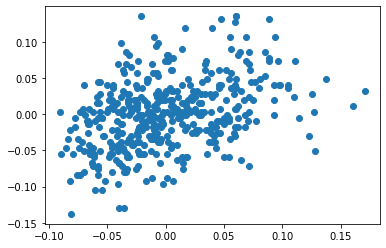

In [4]:
plt.scatter(data[:,2], data[:,9])
plt.show()

__Exercise 1.__ Investigate the relationship between body mass index (data[:,2]) and S6 (data[:,9]). By using the AIC score seen during lesson, can you verify which hypothesis is better supported by the data?

- there is no relationship (constant)
- the relationship is linear
- the relationship is quadratic
- the relationship is cubic
- the relationship is polynomial of order 4

In [44]:
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

__Exercise 2.__ Repeat the exercise by using the BIC. Discuss the differences in the results, if any.

__Exercise 3.__ Which model would you support between the following:

- target depends on _Age_
- target depends on _Age_ and _Sex_
- target depends on _Age_ and _Body mass index_ 
- target depends on _Age_ and _Body mass index_ and _Average blood pressure_
- target depends on _Age_ and _Sex_ and _Body mass index_ 
- target depends on _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_
- target depends on  _Body mass index_ and _Average blood pressure_

Use any metric (or more metrics) at your discretion, and comment the results

## Batch 2

We work with the database ADNI, containing information for a clinical cohort of healhty volunteers and patients with Alzheimer's disease.

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('data.csv')
dataset[:10]

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Data fields:
- RID: subject's identifier
- Hippocampus_volume = normalized volume of the brain region hippocampus
- AGE: subject's age
- PTGENDER: subject's sex (1 Male, 2 Female)
- PTEDUCAT: years of education
- ADAS11: clinical score (Alzheimer's disease assessment scale)
- FDG: measure of average brain metabolism
- DX: clinical diagnosis. In order to severity we have NL (normal), MCI (mild cognitive impairment), and Dementia

__Exercise 1.__ Estimate mean and standard deviation for the classification accuracy of the algorithm Logistic Regression and Nearest Neighbours classifier for predicting clinical diagnosis based on the variables PTEDUCAT, ADAS11, and FDG. (use at least 1000 repetitions)

__Exercise 2__. Compute a 95% confidence interval for the median age in the group Dementia, and in the group healthy (NL). Are the median significantly different?  

__Exercise 3__. Use the information criteria to decide what is the best polynomial model that explains the relatioship between ADAS11 (predictor) and hippocampus_volume (target) in the group MCI? And in the group NL? 

__Exercise 4__. What is the best combination of variables (excluded RID and DX) for predicting FDG with a linear model?